In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import os
import mapclassify

/Users/mochi/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Create Images folder if none already exists
try:
    os.mkdir(path="Images")
except:
    print("Directory already exists, hooray!")

Directory already exists, hooray!


In [3]:
# Read in CSV
data_df = pd.read_csv("Resources/ws_duckhorn_vineyard_napa_merlot.csv")
data_df.head()

,ID,merchant-name,merchant-description,physical-address,street-name,city,zip-code,latitude,longitude,country,state,vintage,price,bottle-size,format,volume,link,Criteria
0,0,B-21,Wine merchant established in 1948. ex. sales tax,"43380 US Highway 19 North, Tarpon Springs, FL ...",Tarpon Springs,Tarpon Springs,34689,28.165844,-82.741050,USA,FL,2018,19.98,Half Bottle (375ml),Half Bottle,375ml,https://www.wine-searcher.com/redirect?from_ty...,duckhorn_vineyard_napa_merlot
1,1,Saratoga Wine Exchange,Retail wine store located in upstate New York....,"43 Round Lake Road, Ballston Lake, NY 12019",Ballston Lake,Ballston Lake,12019,42.934360,-73.812305,USA,NY,2018,23.94,Half Bottle (375ml),Half Bottle,375ml,https://www.wine-searcher.com/redirect?from_ty...,duckhorn_vineyard_napa_merlot
2,2,Hi-Time Wine Cellars,"Retail wine, beer and spirits shop specializin...","250 Ogle Street, Costa Mesa, CA 92627",Costa Mesa,Costa Mesa,92627,33.632900,-117.918368,USA,CA,2018,23.99,Half Bottle (375ml),Half Bottle,375ml,https://www.wine-searcher.com/redirect?from_ty...,duckhorn_vineyard_napa_merlot
3,3,Woods Wholesale Wine,Michigan's #1 Wine & Spirits Retailer. ex. sal...,"20787 Mack Avenue, Grosse Pointe Woods, MI 48236",Grosse Pointe Woods,Grosse Pointe Woods,48236,42.445356,-82.906895,USA,MI,2018,24.94,Half Bottle (375ml),Half Bottle,375ml,https://www.wine-searcher.com/redirect?from_ty...,duckhorn_vineyard_napa_merlot
4,4,K&L Wine Merchants,Wine merchant established in 1976. ex. sales tax,"3005 El Camino Real, Redwood City, CA 94061",Redwood City,Redwood City,94061,37.468422,-122.210258,USA,CA,2018,24.95,Half Bottle (375ml),Half Bottle,375ml,https://www.wine-searcher.com/redirect?from_ty...,duckhorn_vineyard_napa_merlot


In [4]:
# Select specific columns from dataframe
data_slimmed_df = data_df[["state","bottle-size","price"]]

# Select only rows where the merchant is selling 750ml bottles
data_slimmed2_df = data_slimmed_df.loc[data_slimmed_df["bottle-size"]=="Bottle (750ml)"]

# Find the mean and median price of a bottle by state
data_agg_df = data_slimmed2_df.groupby(by="state").agg(["mean","median"]).droplevel(0, axis=1)
data_agg_df.reset_index(level=0, inplace=True)
data_agg_df

,state,mean,median
0,CA,88.490000,49.995
1,CT,48.323333,49.990
2,DC,75.660000,59.990
3,FL,44.841429,42.990
4,IL,45.990000,47.990
5,LA,44.970000,44.970
6,MA,48.737500,49.985
7,MI,55.342000,54.990
8,MO,48.990000,48.990
9,NJ,49.274286,45.980


In [5]:
states = "Resources/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
map_df = gpd.read_file(states)
map_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [6]:
# Merge map dataframe and wine merchant dataframe and check type
map_merge_df = pd.merge(left=data_agg_df, right=map_df, how="outer", left_on="state", right_on="STUSPS")
type(map_merge_df)

pandas.core.frame.DataFrame

In [7]:
# Convert dataframe to a geopandas geodataframe
map_merge_df = GeoDataFrame(map_merge_df)
type(map_merge_df)

geopandas.geodataframe.GeoDataFrame

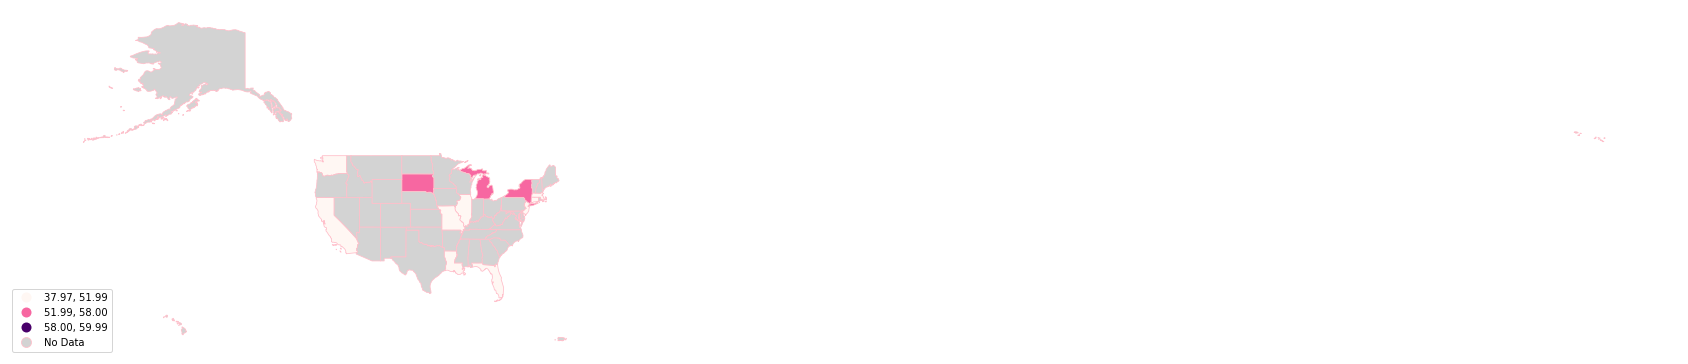

In [8]:
# Set the column that will be visualized
variable = "median"

# Set variable for handling NaN values
missing_kwds = dict(color='lightgrey', label='No Data')

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

# Remove bounding box/axes
ax.axis("off")

# Plot map
(map_merge_df.plot(column=variable, cmap='RdPu', 
                       linewidth=0.8, 
                       ax=ax, 
                       edgecolor="pink", 
                       scheme='userdefined', 
                       classification_kwds={'bins':[51.99, 58]},
                       missing_kwds=missing_kwds, 
                       legend=True, legend_kwds={'loc': 'lower left'}))


# Save figure
plt.savefig("Images/usa_dvme_prices.png", dpi=1200)

plt.show()